# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete=pd.merge(study_results,mouse_metadata,how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Checking the number of mice.
Total_mice = mouse_metadata['Mouse ID'].count()
#school_data['school_name'].nunique()
Total_mice
print(f"Total Number of Mice : {Total_mice}") 

Total Number of Mice : 249


In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [34]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_id = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [36]:
# Checking the number of mice in the clean DataFrame.
Total_mice_count=clean_df['Mouse ID'].nunique()
Total_mice_count
print(f'The number of unique mice in the dataframe is: {Total_mice_count}')

The number of unique mice in the dataframe is: 249


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [113]:
#SOLUTION
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

regimen_summary=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    varience="var",
    std="std",
    sem="sem"

)
regimen_summary


,mean,median,varience,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
#df.columns = pd.MultiIndex.from_product([['tumor volume (mm3)'], df.columns])
regimen_summary =pd.MultiIndex.from_product([['Tumor Volume (mm3)'],regimen_summary.columns])
regimen_summary


MultiIndex([('Tumor Volume (mm3)',     'mean'),
            ('Tumor Volume (mm3)',   'median'),
            ('Tumor Volume (mm3)', 'varience'),
            ('Tumor Volume (mm3)',      'std'),
            ('Tumor Volume (mm3)',      'sem')],
           )

In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df['Drug Regimen'].value_counts()
drug_counts


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

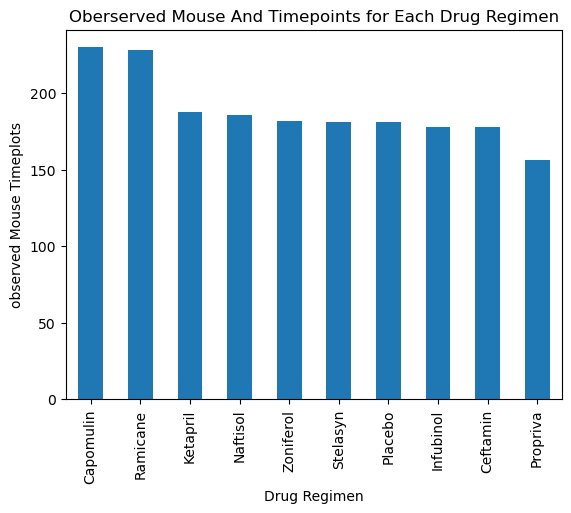

In [57]:
drug_counts.plot(kind='bar')
plt.title('Oberserved Mouse And Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('observed Mouse Timeplots')
plt.show

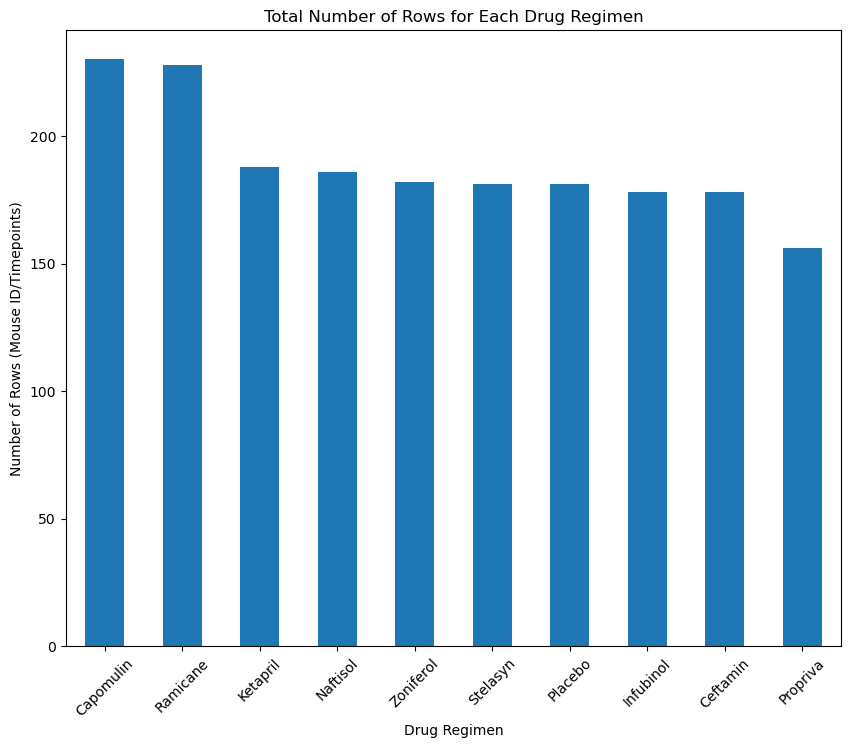

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,8))
drug_counts.plot(kind='bar')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [85]:
unique_gender_df=clean_df[['Mouse ID','Sex']].drop_duplicates()
unique_gender_df

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
245,t565,Female
246,i557,Female
247,m957,Female
248,f966,Male


In [43]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [86]:
male_count = unique_gender_df['Sex'].value_counts()['Male']
male_count

print(f"Total number of male mice: {male_count}")

Total number of male mice: 125


In [90]:
percentage_male = (male_count / Total_mice_count) * 100
percentage_male
print(f"Percentage of male mice: {percentage_male:.1f}%")

Percentage of male mice: 50.2%


In [89]:
Female_count = unique_gender_df['Sex'].value_counts()['Female']
Female_count

print(f"Total number of male mice: {Female_count}")

Total number of male mice: 124


In [91]:
percentage_Female = (Female_count / Total_mice_count) * 100
percentage_Female
print(f"Percentage of Female mice: {percentage_Female:.1f}%")

Percentage of male mice: 49.8%


In [103]:
data= {
    'Gender': ['Male', 'Female'],
    'Count': [male_count,Female_count],
    'Percentage': [percentage_male, percentage_Female]
}
Pie_chart_df = pd.DataFrame(data)
Pie_chart_df



,Gender,Count,Percentage
0,Male,125,50.200803
1,Female,124,49.799197


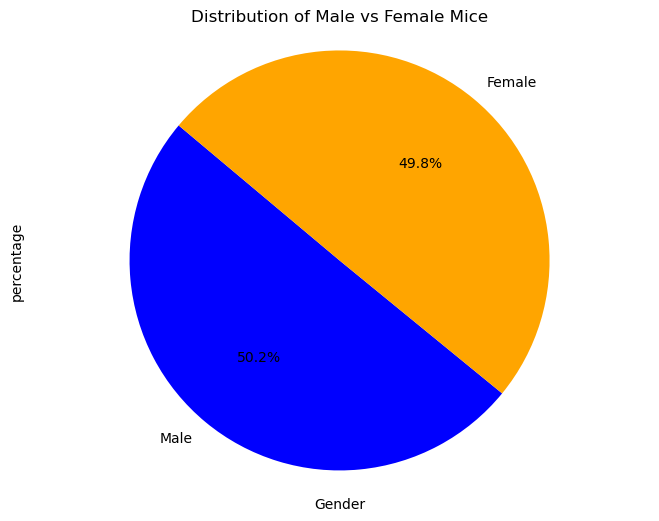

In [109]:
plt.figure(figsize=(8, 6))
plt.pie(Pie_chart_df['Count'], labels=Pie_chart_df['Gender'], autopct='%1.1f%%', startangle=140, colors=['Blue', 'Orange'])
plt.title('Distribution of Male vs Female Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.show()

## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
filtered_df 






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [116]:
 #Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [117]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoint.merge(filtered_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [125]:
# Display the final tumor volume for each mouse
final_tumor_volumes = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes
print(final_tumor_volumes)

   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [156]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volumes['Drug Regimen'].unique().tolist()
treatments


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [145]:
# Create empty list to fill with tumor vol data (for plotting)
# Example of using the treatments list in a for loop for plotting
tumor_vol_data = {treatment: [] for treatment in treatments}
tumor_vol_data




{'Infubinol': [], 'Ceftamin': [], 'Ramicane': [], 'Capomulin': []}

In [178]:
# Fill the dictionary with tumor volume data
for treatment in treatments:
    volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].tolist()
    tumor_vol_data[treatment] = volumes
    # Print the treatments and the tumor volume data
    print("Treatments:", treatment)
    print("Tumor Volume Data:", treatment, tumor_vol_data[treatment])


    


Treatments: Infubinol
Tumor Volume Data: Infubinol [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]
Treatments: Ceftamin
Tumor Volume Data: Ceftamin [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
Treatments: Ramicane
Tumor Volume Data: Ramicane [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.5616522

In [159]:



# Create a list of tumor volume data for each treatment
box_plot_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in tumor_vol_data.items()]))
box_plot_df





,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220
5,36.321346,47.784682,33.397653,47.685963
6,60.969711,61.849023,37.311236,37.311846
7,62.435404,68.923185,40.659006,38.125164
8,60.918767,67.748662,29.128472,38.753265
9,67.289621,57.918381,33.562402,41.483008


In [168]:


# Function to calculate IQR and identify outliers
def calculate_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return IQR, outliers

# Calculate IQR and outliers for each treatment
for treatment in box_plot_df.columns:
    IQR, outliers = calculate_iqr_outliers(box_plot_df[treatment])
    print(f"{treatment} - IQR: {IQR:.2f}")
    print(f"{treatment} - Outliers: {outliers.tolist()}")



Infubinol - IQR: 11.48
Infubinol - Outliers: [36.3213458]
Ceftamin - IQR: 15.58
Ceftamin - Outliers: []
Ramicane - IQR: 9.10
Ramicane - Outliers: []
Capomulin - IQR: 7.78
Capomulin - Outliers: []


ValueError: Dimensions of labels and X must be compatible

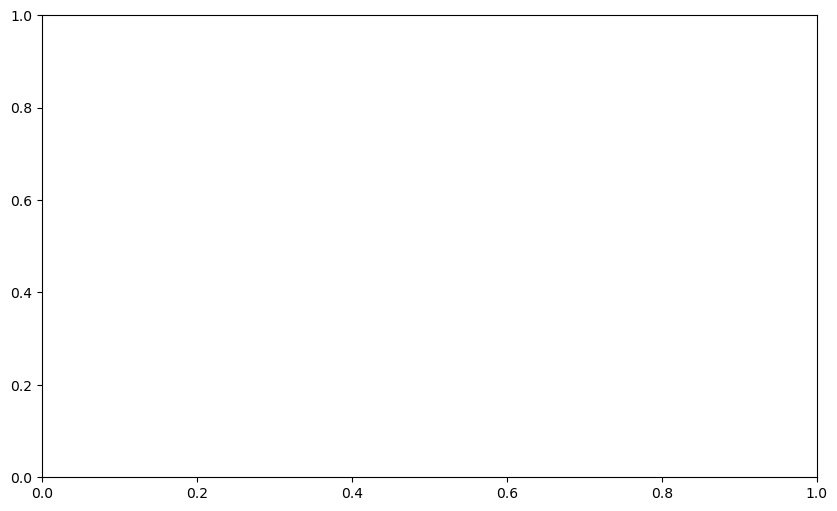

In [179]:
 #Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments)

# Add title and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
